- Author: Ashish Dutt
- Version: 0.0.1

### Intuition Behind Time Series Data Analysis in Python

Time series data analysis involves working with data that is collected or recorded at regular time intervals, such as daily stock prices, hourly weather readings, or monthly sales data. The goal is to analyze this data to understand underlying patterns, trends, and seasonality, and to make predictions about future data points.

In Python, time series data analysis often involves:


1. Handling Date/Time Data: Parsing dates and times correctly and ensuring they are in the right format.
2. Aggregating Data: Summarizing data over different time intervals (e.g., daily, weekly).
3. Creating New Features: Adding derived features like moving averages or rolling statistics to capture trends or fluctuations.
4. Pivoting Data: Reshaping data to make it easier to analyze and visualize.

In [6]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

Let's dive into the key concepts with simple explanations and code examples.

#### 1. Rolling Mean (Moving Average)

**Theory**

A rolling mean (or moving average) is a technique used to smooth out short-term fluctuations and highlight longer-term trends or cycles. It calculates the average of the data points within a specific window size (e.g., 3 days) as you move through the data.

**Code Example**

            value  rolling_mean_3
2023-01-01      2             NaN
2023-01-02      3             NaN
2023-01-03      4            3.00
2023-01-04      8            5.00
2023-01-05      6            6.00
2023-01-06      5            6.33
2023-01-07      7            6.00
2023-01-08     10            7.33
2023-01-09     11            9.33
2023-01-10      9           10.00


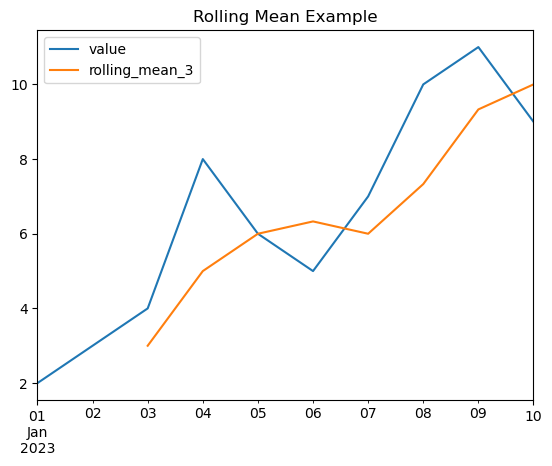

In [3]:
# Example time series data
dates = pd.date_range(start='2023-01-01', periods=10, freq='D')
df = pd.DataFrame({'value': [2, 3, 4, 8, 6, 5, 7, 10, 11, 9]}, index=dates)

# Calculate a 3-day rolling mean
df['rolling_mean_3'] = round(df['value'].rolling(window=3).mean(),2)

print(df)

# Plot the original data and rolling mean
df.plot(title='Rolling Mean Example')
plt.show()

**Explanation:**

- The rolling method calculates the mean of the values within the specified window (3 days in this case).
- The rolling mean smooths out the fluctuations, making it easier to see the overall trend.

#### 2. Time-Based Aggregation

**Theory**

Time-based aggregation is the process of **summarizing** data over specified time periods, like calculating daily, weekly, or monthly averages. This helps to reduce the data's granularity and focus on broader trends.

**Code Example**

In [7]:
# Example time series data with hourly frequency
dates = pd.date_range(start='2023-01-01', periods=48, freq='H')
data = pd.DataFrame({'value': np.random.randint(1, 10, size=len(dates))}, index=dates)

# Aggregate data by day (sum of values)
daily_data = data.resample('D').sum()

print(daily_data)

            value
2023-01-01    122
2023-01-02    112


**Explanation:**


- The `resample()` method is used to aggregate data. Here, we resample the data to daily frequency (`D`) and calculate the sum of values within each day.
- You can change the aggregation function (e.g., `mean`, `max`, `min`) depending on what summary you want.

#### 3. Pivoting Data

**Theory**

Pivoting is a way to transform or reshape data to make it easier to analyze. In time series data, you might pivot data to get a clearer view of how values change across different time intervals, like days of the week, or hours of the day.

**Code Example**

In [8]:
# Example time series data with hourly frequency
dates = pd.date_range(start='2023-01-01', periods=24*7, freq='H')
data = pd.DataFrame({'value': np.random.randint(1, 10, size=len(dates))}, index=dates)

# Add day of the week and hour columns
data['day_of_week'] = data.index.dayofweek
data['hour'] = data.index.hour

# Pivot data to show average value for each hour of each day of the week
pivot_data = data.pivot_table(values='value', index='hour', columns='day_of_week', aggfunc='mean')

print(pivot_data)

day_of_week    0    1    2    3    4    5    6
hour                                          
0            8.0  3.0  5.0  6.0  3.0  7.0  3.0
1            2.0  3.0  8.0  6.0  7.0  6.0  5.0
2            5.0  6.0  1.0  9.0  8.0  3.0  6.0
3            6.0  3.0  7.0  8.0  1.0  3.0  5.0
4            7.0  2.0  1.0  6.0  6.0  9.0  8.0
5            2.0  2.0  4.0  4.0  1.0  7.0  7.0
6            5.0  9.0  3.0  6.0  3.0  3.0  2.0
7            7.0  1.0  2.0  2.0  7.0  6.0  5.0
8            4.0  4.0  7.0  7.0  5.0  9.0  1.0
9            8.0  5.0  8.0  8.0  6.0  3.0  3.0
10           1.0  1.0  5.0  6.0  7.0  8.0  4.0
11           7.0  2.0  2.0  1.0  6.0  7.0  9.0
12           4.0  2.0  5.0  6.0  2.0  6.0  1.0
13           7.0  6.0  1.0  2.0  9.0  1.0  7.0
14           5.0  2.0  8.0  1.0  2.0  1.0  9.0
15           2.0  3.0  8.0  7.0  8.0  1.0  1.0
16           8.0  6.0  3.0  9.0  4.0  9.0  6.0
17           3.0  3.0  9.0  9.0  5.0  8.0  8.0
18           5.0  5.0  7.0  7.0  8.0  9.0  2.0
19           

**Explanation:**


- The pivot_table method reshapes the data, creating a table where rows represent hours, columns represent days of the week, and the cells contain the average value for each hour of each day.
- This kind of pivoting helps in visualizing patterns, like how certain hours or days might have higher or lower values.

**Summary**


In summary, time series data analysis in Python involves:

- Rolling Mean: Smoothing data to observe trends.
- Time-Based Aggregation: Summarizing data over different time periods to see broader trends.
- Pivoting Data: Reshaping data to analyze it from different perspectives.

These techniques are fundamental in understanding and predicting time series data, allowing you to make better decisions based on observed trends and patterns.